In [ ]:
!pip install psycopg2 # allows to connect to PostgreSQL from python
import psycopg2 as ps
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def connect_to_db(host_name, dbname, port, username, password):
  try:
    conn = ps.connect(host=host_name, database=dbname, user=username, password=password, port=port)
  except ps.OperationalError as e:
    raise e
  else:
    print('Connected!')
  return conn

In [ ]:
#database credentials
host_name = "YourHostName"
dbname = "YourDBName"
port = "5432"
username = "username"
password = "YourPass"
conn = None

#establish a connection to db
conn = connect_to_db(host_name, dbname, port, username, password)

Connected!


In [ ]:
df = pd.read_sql("SELECT * FROM VIDEOS", conn)
df

,video_id,video_title,upload_date,view_count,like_count,comment_count
0,mTL23Gd-T3g,Engagement_Ring_Animation,2022-08-26,52,1,0
1,MEnebfZ_CyQ,Ring_and_band_animation,2022-07-29,69,2,1
2,3TxVeAGJXCQ,Ring_animation_diamond,2022-07-27,114,3,1
3,VKVknZOXDSo,white_gold_Ring,2021-03-02,364,13,1
4,cUEueCDG-xY,Ambiguous_Cylinder_Illusion,2020-07-22,126,6,3
5,uasLj9J56os,swiss_blue_topaz_ring,2020-07-10,113,4,3


In [ ]:
conn.commit()
conn.close()

Text(-0.65, 365, 'Most Viewed Video has 1 comment')

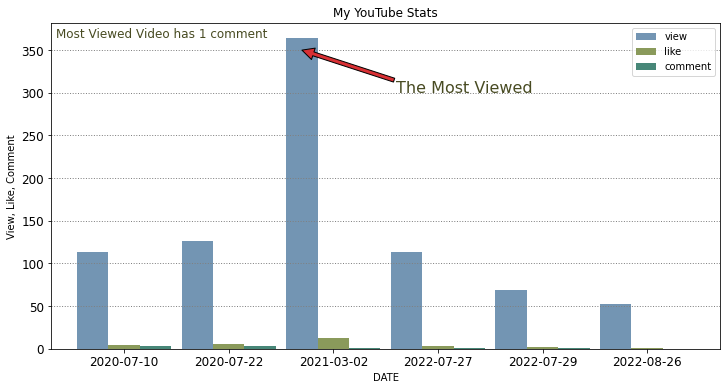

In [ ]:
df2=df.iloc[::-1]
df2.rename(columns = {'view_count':'view', 'like_count':'like',
                              'comment_count':'comment'}, inplace = True)
df2.plot.bar(x='upload_date',
            rot=0,
            color=[(115/255,149/255,179/255), (138/255,154/255,91/255), (71/255,135/255,120/255)], # passing normalized RGB colors 
            figsize=(12,6), # Figsize to make the plot larger
            width=0.9,
            # stacked=True,
            title='My YouTube Stats', # Adding a title to the top
            xlabel="DATE", # Adding a label on the xaxis
            ylabel="View, Like, Comment", # Adding a label on y axis
            fontsize='large'); # Making my ticks a bit bigger
plt.grid(True,axis='y', color = "grey", linewidth = "1", linestyle = ":")
plt.annotate('The Most Viewed', xy = (1.7, 350), 
             fontsize = 16, xytext = (2.6, 300), 
             arrowprops = dict(facecolor = '#D93034'),
             color = '#484B22')
plt.text(-0.65,365, 'Most Viewed Video has 1 comment', 
         fontsize = 12, color = '#484B22')